# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(10)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [3]:
df['Profissão_cod'] = df['Profissão'].astype('category').cat.codes
df['Estado_Civil_cod'] = df['Estado_Civil'].astype('category').cat.codes
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Salário'] = df['Limite_Credito'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)
pd.set_option('display.width', None)
print(df.head(10))

      Nome  Idade   Profissão  Salário  Limite_Credito  \
0    Alice     25  Engenheiro     2500            2500   
1     Joao     30      Médico     4000            4000   
2  Charlie     35   Professor     4000            4000   
3    David     40    Advogado     1000            1000   
4      Eva     45      Médico    10000           10000   
5    Diego     60  Engenheiro     2000            2000   
6   Denize     22   Estudante      500             500   
7  Claudio     24   Estudante      250             250   

   Historico_Inadimplencia Estado_Civil Imovel_Proprio  Profissão_cod  \
0                        0    Casamento              0              1   
1                        0    Casamento              0              3   
2                        0     Solteiro              0              4   
3                        1     Solteiro              1              0   
4                        0    Casamento              1              3   
5                        1     Solteiro

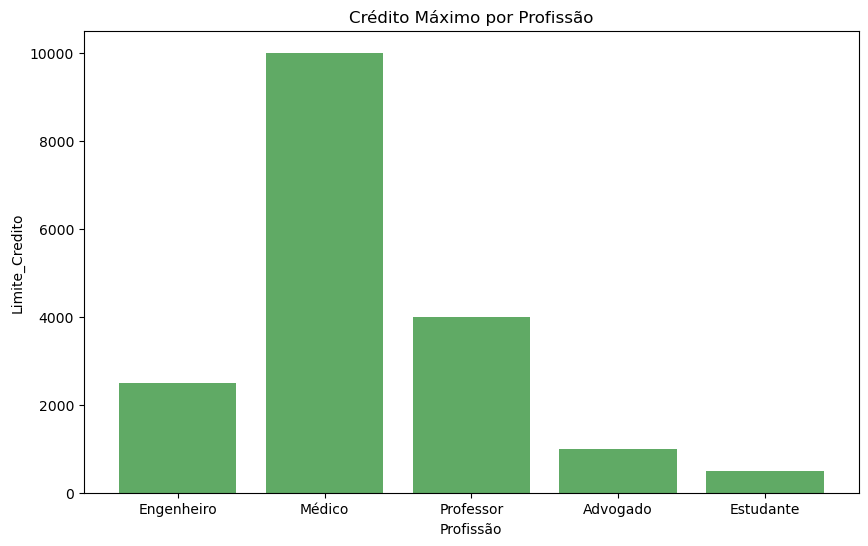

In [4]:
# Gráfico de Barras
x = df['Profissão']
y = df['Limite_Credito']

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='#60aa65')
plt.title('Crédito Máximo por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Limite_Credito')
plt.show()

#No Gráfico a seguir fiz a correlação entre Profissão e Limite Crédito, onde temos o crétido máximo entre a cada profissão.
#É possível deduzir que o gráfico está distribuído dessa forma pois Estudantes não tem um salário consolidado e Médicos tem o histórico de maior salário


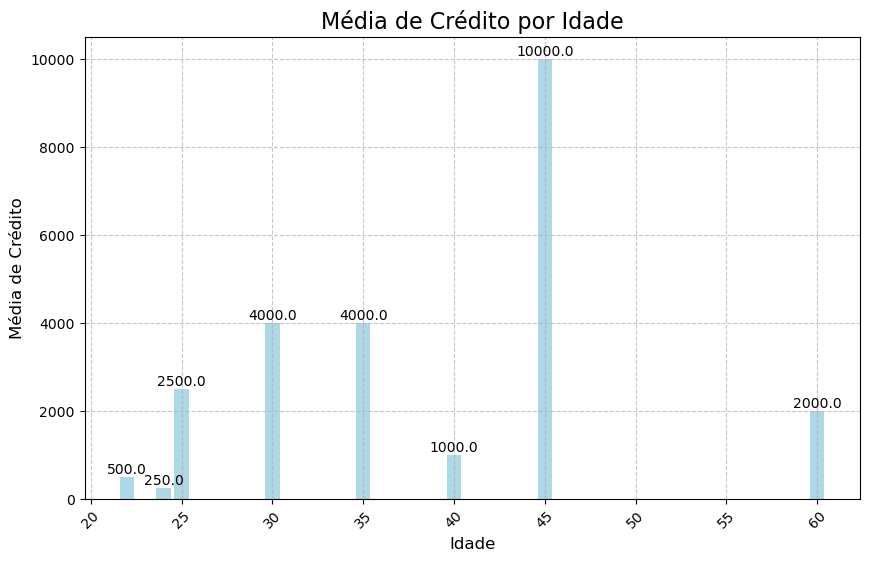

In [5]:
media_crédito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(media_crédito_por_idade.index, media_crédito_por_idade, color='lightblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom', fontsize=10)

plt.title('Média de Crédito por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Média de Crédito', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Agora fizemos uma média de crédito por idade, conseguimos perceber que jovens abaixo dos 30 não vão obter um crédito fácil
# Dos 30 aos 40 é onde temos um crédito médio e dos 40 aos 60 temos o maior limite médio de crédito.

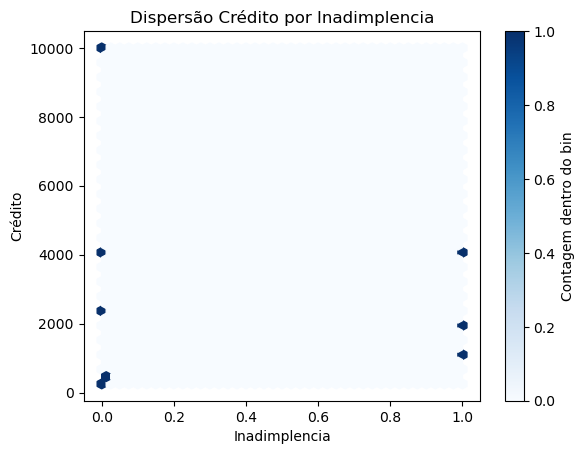

In [8]:
#media_Salario_por_idade = df.groupby('Idade')['Salário'].mean()
inadimplencia = df['Historico_Inadimplencia']
Credito = df['Limite_Credito']
plt.hexbin(inadimplencia, media_Limite_Credito_por_idade, gridsize=40, cmap='Blues')
plt.colorbar(label='Contagem dentro do bin')
plt.xlabel('Inadimplencia')
plt.ylabel('Crédito')
plt.title('Dispersão Crédito por Inadimplencia')
plt.show()

